In [47]:
import numpy as np
import pandas as pd

In [48]:
# Data
dat = pd.read_csv('Clean_Key_indicator_districtwise.csv')

In [49]:
x = dat.values

In [50]:
z = np.isnan(x)

In [51]:
x[z] = 0

In [52]:
# Perform PCA
from sklearn.decomposition import FactorAnalysis

In [53]:
fa = FactorAnalysis(n_components=5)

In [54]:
fa.fit(x)

FactorAnalysis(copy=True, iterated_power=3, max_iter=1000, n_components=5,
        noise_variance_init=None, random_state=0, svd_method='randomized',
        tol=0.01)

In [55]:
#print(pca.explained_variance_ratio_)  

In [56]:
dat

,Unnamed: 0,AA_Population_Total,AA_Population_Rural,AA_Population_Urban,AA_Ever_Married_Women_Aged_15_49_Years_Total,AA_Ever_Married_Women_Aged_15_49_Years_Rural,AA_Ever_Married_Women_Aged_15_49_Years_Urban,AA_Currently_Married_Women_Aged_15_49_Years_Total,AA_Currently_Married_Women_Aged_15_49_Years_Rural,AA_Currently_Married_Women_Aged_15_49_Years_Urban,...,ZZ_Infant_Mortality_Rate_Urban_Lower_Limit,ZZ_Infant_Mortality_Rate_Urban_Upper_Limit,ZZ_Under_Five_Mortality_Rate_U5MR_Urban_Lower_Limit,ZZ_Under_Five_Mortality_Rate_U5MR_Urban_Upper_Limit,ZZ_Sex_Ratio_At_Birth_Total_Lower_Limit,ZZ_Sex_Ratio_At_Birth_Total_Upper_Limit,ZZ_Sex_Ratio_At_Birth_Rural_Lower_Limit,ZZ_Sex_Ratio_At_Birth_Rural_Upper_Limit,ZZ_Sex_Ratio_At_Birth_Urban_Lower_Limit,ZZ_Sex_Ratio_At_Birth_Urban_Upper_Limit
0,0,0,0,0,0,0,0,0.932302,0.067698,0.932553,...,NaN,NaN,NaN,NaN,871,985,851,965,908.0,1611.0
1,1,0,0,0,0,0,0,0.869495,0.130505,0.873366,...,NaN,NaN,NaN,NaN,897,1005,911,1026,621.0,956.0
2,2,0,0,0,0,0,0,0.881315,0.118685,0.880247,...,25.00,49.00,31.0,57.0,891,966,871,949,905.0,1168.0
3,3,0,0,0,0,0,0,0.972898,0.027102,0.971951,...,NaN,NaN,NaN,NaN,913,1102,908,1097,NaN,NaN
4,4,0,0,0,0,0,0,0.875203,0.124797,0.876340,...,9.00,33.00,11.0,38.0,935,1045,938,1054,772.0,1083.0
5,5,0,0,0,0,0,0,0.906867,0.093133,0.907981,...,NaN,NaN,NaN,NaN,868,998,864,998,716.0,1260.0
6,6,0,0,0,0,0,0,0.778489,0.221511,0.779731,...,28.00,61.00,37.0,64.0,875,972,871,977,813.0,1046.0
7,7,0,0,0,0,0,0,0.922665,0.077335,0.923599,...,NaN,NaN,NaN,NaN,871,976,862,969,834.0,1319.0
8,8,0,0,0,0,0,0,0.887282,0.112718,0.886743,...,NaN,NaN,NaN,NaN,893,1004,902,1020,713.0,1032.0
9,9,0,0,0,0,0,0,0.853259,0.146741,0.849140,...,NaN,NaN,NaN,NaN,735,918,743,938,466.0,1018.0


In [57]:
w = fa.transform(x)

In [58]:
h = fa.components_

In [59]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [60]:
def getTopK(vec,labels,K,plot = False):
    args = np.argsort(np.absolute(vec))
    topK = vec[args[-K:]]
    labelsK = labels[args[-K:]]
    signsK = np.sign(topK)
    if plot:
        plt.bar(range(0,K),topK) #'tick_label=labelsK
        plt.show()
    return labelsK, signsK

In [61]:
labels = np.zeros((5,3)).astype('S256')
signs = np.zeros((5,3))
for i in range(0,5):
    [labelsK, signsK] = getTopK(h[i],dat.columns,3, plot = False)
    #print(labelsK)
    labels[i] = labelsK
    signs[i] = signsK

Index([u'JJ_Persons_Suffering_From_Acute_Illness_Per_100000_Population_Any_Type_Of_Acute_Illness_Male_Urban',
       u'JJ_Persons_Suffering_From_Acute_Illness_Per_100000_Population_Any_Type_Of_Acute_Illness_Person_Urban',
       u'JJ_Persons_Suffering_From_Acute_Illness_Per_100000_Population_Any_Type_Of_Acute_Illness_Female_Urban'],
      dtype='object')
Index([u'JJ_Persons_Suffering_From_Acute_Illness_Per_100000_Population_Any_Type_Of_Acute_Illness_Female_Total',
       u'JJ_Persons_Suffering_From_Acute_Illness_Per_100000_Population_Any_Type_Of_Acute_Illness_Person_Rural',
       u'JJ_Persons_Suffering_From_Acute_Illness_Per_100000_Population_Any_Type_Of_Acute_Illness_Female_Rural'],
      dtype='object')
Index([u'JJ_Persons_Suffering_From_Acute_Illness_Per_100000_Population_Any_Type_Of_Acute_Illness_Male_Rural',
       u'JJ_Persons_Suffering_From_Acute_Illness_Per_100000_Population_Any_Type_Of_Acute_Illness_Person_Rural',
       u'JJ_Persons_Suffering_From_Acute_Illness_Per_100000_Po

In [74]:
labels[2]

array([ 'JJ_Persons_Suffering_From_Acute_Illness_Per_100000_Population_Any_Type_Of_Acute_Illness_Male_Rural',
       'JJ_Persons_Suffering_From_Acute_Illness_Per_100000_Population_Any_Type_Of_Acute_Illness_Person_Rural',
       'JJ_Persons_Suffering_From_Acute_Illness_Per_100000_Population_Any_Type_Of_Acute_Illness_Female_Rural'],
      dtype='|S256')

In [ ]:
signs[:,1]

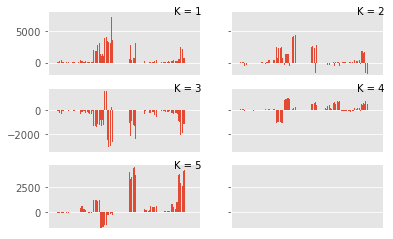

In [68]:
f, axarr = plt.subplots(3, 2,sharex= 'col', sharey='row')
row = [1,1,3,3,5]
for i in range(0,5):
    #axarr[i].subplot(3,2,i+1)
    axarr[i/2,i%2].bar(range(100,275),h[i,100:275])
    axarr[i/2,i%2].axes.get_xaxis().set_visible(False)
    axarr[i/2,i%2].text(250,max(h[row[i]-1,100:275])-75,'K = ' + str(i+1))
axarr[2,1].axes.get_xaxis().set_visible(False)
plt.show()

In [ ]:
i/3

In [ ]:
plt.plot(w[:,0],w[:,1],'o',markersize=1)
plt.show()

In [ ]:
from sklearn.linear_model import BayesianRidge

In [ ]:
bayreg = BayesianRidge()

In [ ]:
full_data = pd.read_csv('Key_indicator_districtwise.csv')

In [ ]:
y_labels = ['YY_Infant_Mortality_Rate_Imr_Total_Person']
y = full_data[y_labels].values

In [ ]:
bayreg.fit(w,y)

In [ ]:
bayreg.coef_

In [ ]:
bayreg.score(w,y)